# <centrer> **PROJET NLP DU MODULE MACHINE LEARNING :** </centrer>

## <centrer> **$\color{blue}{\text{ANALYSE DES TWEETS : DISASTER OR NORMAL}}$** </centrer>

#### <centrer> Cheikh Tidiane DIAGNE </centrer>
#### <centrer> Alioune CISSE </centrer>
#### <centrer> Serigne Mbaye THIAM </centrer>
#### <centrer> *Elèves ingénieurs statisticiens économistes* </centrer>
#### <centrer> *Sous la supervision de* Mme Mously DIAW, Data scientist </centrer>

## <center> **$\color{green}{\text{I. IMPORTATION DES LIBRAIRIES NECESSAIRES}}$** </center>

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, re, string
from sklearn.pipeline import Pipeline
from re import sub
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score, classification_report

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
#machine learning
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression, Perceptron
# machine learning
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Safietou
[nltk_data]     CISSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Safietou
[nltk_data]     CISSE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Safietou
[nltk_data]     CISSE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## <center> **$\color{green}{\text{II. IMPORTATION ET VISUALISATION DES DONNEES}}$** </center>

### <center> **$\color{green}{\text{II.1. IMPORTATION}}$** </center>

In [2]:
base = pd.read_csv('disaster_tweets.csv')
base.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

### <center> **$\color{green}{\text{II.2. ETIQUETTAGE DES DONNEES}}$** </center>

In [3]:
data = pd.DataFrame({"tweet": base.text,
                     "target": base.target
                    })

print(f"Shape of data: {data.shape}")

Shape of data: (7613, 2)


In [4]:
data.head()

tweet  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1

In [5]:
LABELS = ['Normal','Disaster']

In [6]:
# Ajout d'une colonne pour les noms des targets 
data["target_name"] = data.target.map(lambda val: LABELS[val])
data.head()

tweet  target target_name
0  Our Deeds are the Reason of this #earthquake M...       1    Disaster
1             Forest fire near La Ronge Sask. Canada       1    Disaster
2  All residents asked to 'shelter in place' are ...       1    Disaster
3  13,000 people receive #wildfires evacuation or...       1    Disaster
4  Just got sent this photo from Ruby #Alaska as ...       1    Disaster

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        7613 non-null   object
 1   target       7613 non-null   int64 
 2   target_name  7613 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.6+ KB


### <center> **$\color{green}{\text{II.3. VISUALISATION}}$** </center>

### <center> **$\color{green}{\text{II.3.1. VISUALISATION DES TARGETS}}$** </center>

Text(0.5, 1.0, 'Diagramme en barres des targets')

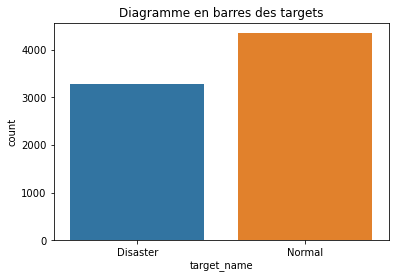

In [8]:
# Diagramme en barres représentant les target
sns.countplot(data['target_name'])
plt.title("Diagramme en barres des targets")

In [9]:
# Creation d'une colonne avec les longueurs des Tweets
data['longueur'] = data['tweet'].apply(len)
data.tail(25)

tweet  target target_name  \
7588  BREAKING: #ISIS claims responsibility for mosq...       1    Disaster   
7589                                     Omg earthquake       1    Disaster   
7590  SEVERE WEATHER BULLETIN No. 5 FOR: TYPHOON ÛÏ...       1    Disaster   
7591  Heat wave warning aa? Ayyo dei. Just when I pl...       1    Disaster   
7592  An IS group suicide bomber detonated an explos...       1    Disaster   
7593  I just heard a really loud bang and everyone i...       0      Normal   
7594  A gas thing just exploded and I heard screams ...       1    Disaster   
7595  NWS: Flash Flood Warning Continued for Shelby ...       1    Disaster   
7596  RT @LivingSafely: #NWS issues Severe #Thunders...       1    Disaster   
7597  #??? #?? #??? #??? MH370: Aircraft debris foun...       1    Disaster   
7598  Father-of-three Lost Control of Car After Over...       1    Disaster   
7599  1.3 #Earthquake in 9Km Ssw Of Anza California ...       1    Disaster   
7600  Evacuation order lifted for town of Roosevelt:...       1    Disaster   
7601  #breaking #LA Refugio oil spill may have been ...       1    Disaster   
7602  a siren just went off and it wasn't the Forney...       1    Disaster   
7603  Officials say a quarantine is in place at an A...       1    Disaster   
7604  #WorldNews Fallen powerlines on G:link tram: U...       1    Disaster   
7605  on the flip side I'm at Walmart and there is a...       1    Disaster   
7606  Suicide bomber kills 15 in Saudi security site...       1    Disaster   
7607  #stormchase Violent Record Breaking EF-5 El Re...       1    Disaster   
7608  Two giant cranes holding a bridge collapse int...       1    Disaster   
7609  @aria_ahrary @TheTawniest The out of control w...       1    Disaster   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1    Disaster   
7611  Police investigating after an e-bike collided ...       1    Disaster   
7612  The Latest: More Homes Razed by Northern Calif...       1    Disaster   

      longueur  
7588       132  
7589        14  
7590       145  
7591        79  
7592       136  
7593        60  
7594        91  
7595       107  
7596       134  
7597       122  
7598       114  
7599       131  
7600        92  
7601        99  
7602        65  
7603       136  
7604       136  
7605       114  
7606       121  
7607       134  
7608        83  
7609       125  
7610        65  
7611       137  
7612        94

### **$\color{green}{\text{II.3.2. VISUALISATION DES TWEETS}}$**

Text(0.5, 1.0, 'Histogramme des longueures des tweets')

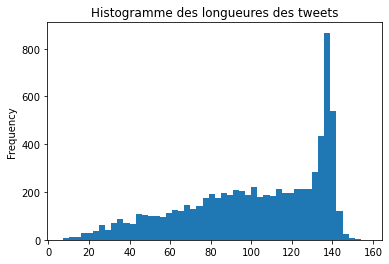

In [10]:
# Représentation de la taille des tweets
data['longueur'].plot(bins=50, kind='hist')
plt.title("Histogramme des longueures des tweets")

In [11]:
#Description de la longueure des tweets
data.longueur.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: longueur, dtype: float64

In [12]:
# La taille du plus grand text dans la base
max_val_sum = max(data['tweet'], key=len)
print("Le tweet de longueur maximale est :\n" ,max_val_sum,"\n Et sa longueur est : ",len(max_val_sum))

Le tweet de longueur maximale est :
 when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned?????????????????????????????????????????????????? 
 Et sa longueur est :  157


In [13]:
# La taille du plus petit text dans la base 
min_val_sum = min(data['tweet'],key=len)
print("Le tweet de longueur minimale est :\n" ,min_val_sum,"\n Et sa longueur est :",len(min_val_sum))

Le tweet de longueur minimale est :
 Crushed 
 Et sa longueur est : 7


array([<AxesSubplot:title={'center':'Disaster'}>,
       <AxesSubplot:title={'center':'Normal'}>], dtype=object)

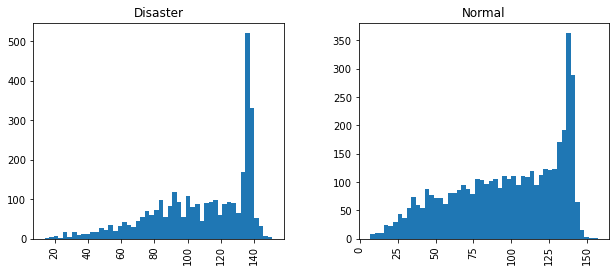

In [14]:
# Représentations séparées des target
data.hist(column='longueur', by='target_name', bins=50,figsize=(10,4))

In [15]:
# Fonction pour concaténer des tweets
def ConvertirText(texte):
    final_text = ''
    for tweet in texte:
        
        tokens = word_tokenize(tweet.lower())
        tokens = ' '.join(tokens)
        final_text = final_text + tokens + ' '
    
    return final_text

In [16]:
cleaned_tweet = data[['tweet','target']]
Disast_tweet = cleaned_tweet[cleaned_tweet['target']==1]
Normale_tweet = cleaned_tweet[cleaned_tweet['target']==0]

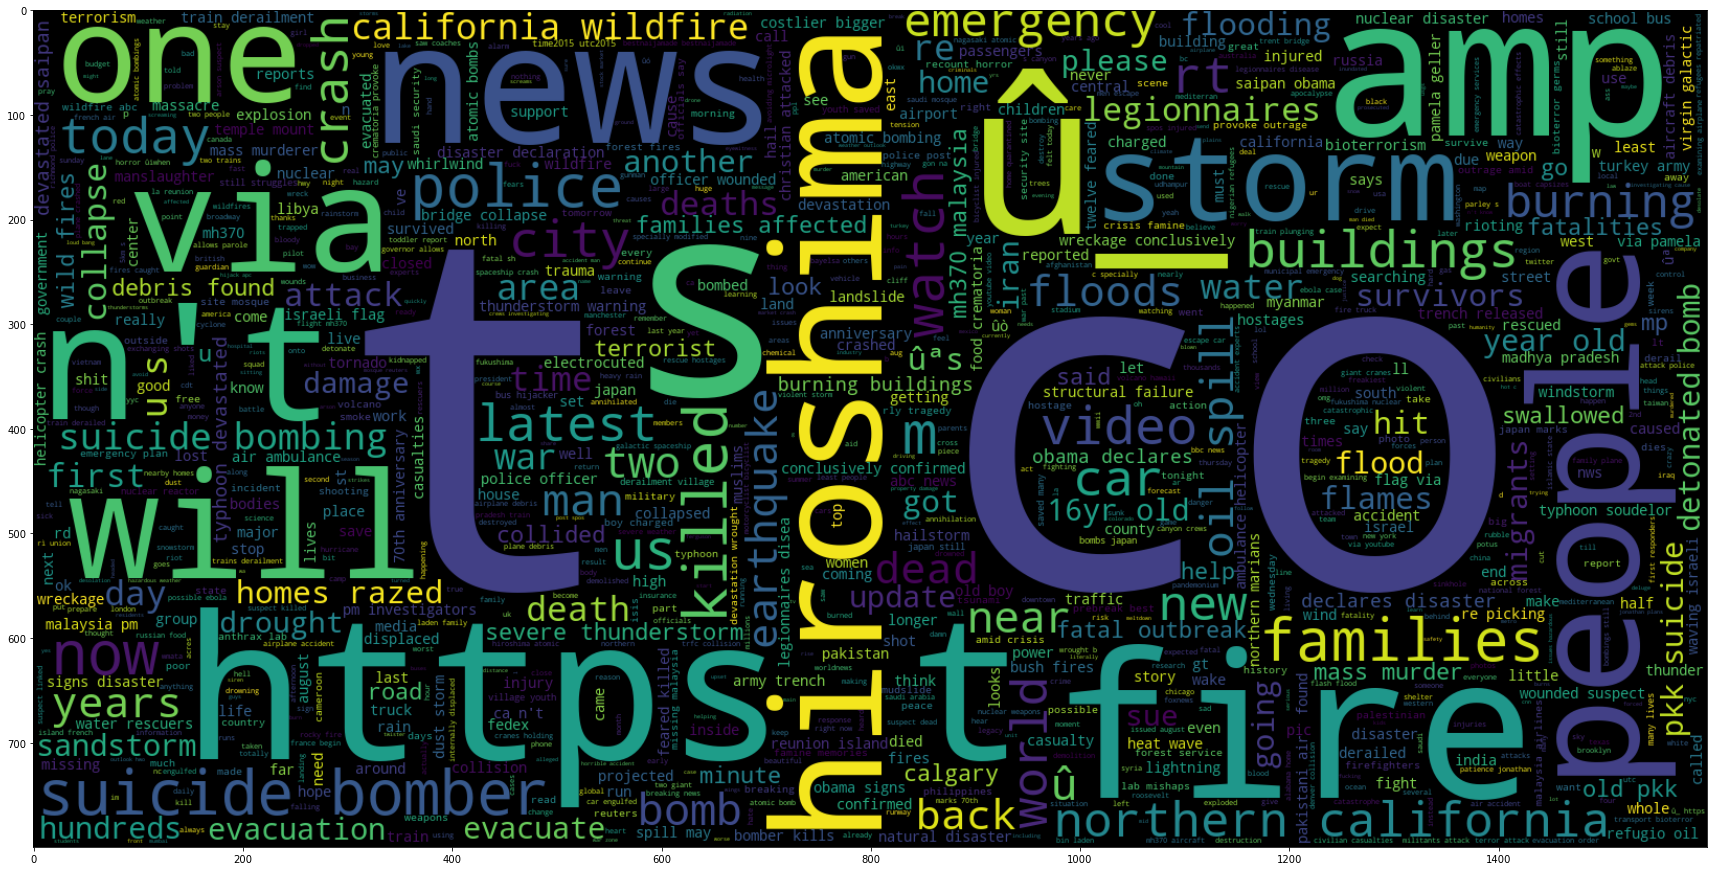

In [17]:
#Représentation des disaster tweet avec WordCloud avant preprocessing

from wordcloud import WordCloud
plt.figure(figsize = (30,30)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 ,normalize_plurals = False, width = 1600 , height = 800).generate(ConvertirText(Disast_tweet.tweet))
plt.imshow(wc , interpolation = 'bilinear')

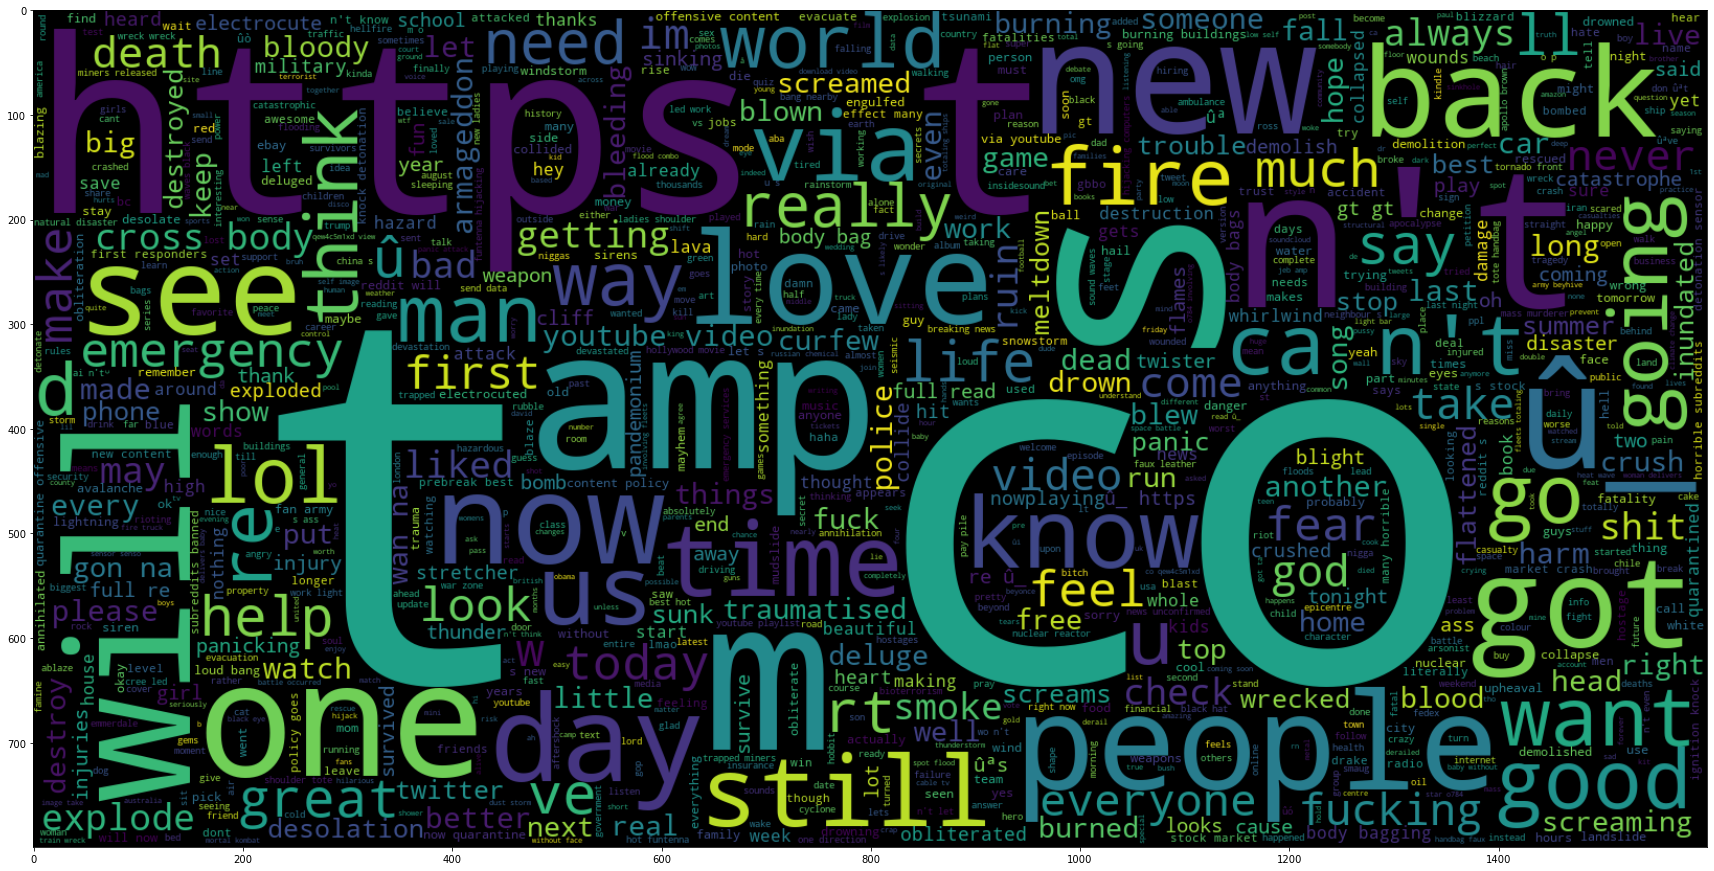

In [88]:
#Représentation des Normal tweet avec WordCloud avant preprocessing

from wordcloud import WordCloud
plt.figure(figsize = (30,30)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 ,normalize_plurals = False, width = 1600 , height = 800).generate(ConvertirText(Normale_tweet.tweet))
plt.imshow(wc , interpolation = 'bilinear')

## <center> **$\color{green}{\text{III. PREPROCESSING}}$** </center>

### <center> **$\color{green}{\text{III.1. Nettoyage du texte (suppression de caracteres speciaux, suppression chiffres, mails...}}$** </center>

In [19]:
# Fonction permettant de nettoyer les données

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def remove_stopword(text):
    
    final_text = []
    
    for tweets in text:
        
        final_tweet = []
        
        tweets = re.sub(r'(http|www)\S*|\S*@\S*\s*|[^\w\s]|<.*?>', '', tweets)
        tweets = re.sub(re.compile('[^a-zA-Z]'),' ',tweets)        
        #Tokenization
        tweet = word_tokenize(tweets.lower())
        
        for word in tweet:
            
            if word not in stop and len(word)!=0:
                final_tweet.append(lemma.lemmatize(word))
        
        final_text.append(final_tweet)
        
    return final_text


In [20]:
# Application de la fonction de nettoyge et ajout des résultats dans une nouvelle colonne

data['cleaned_tweet'] = remove_stopword(data['tweet'])

In [21]:
#Affichage des premières lignes

data['cleaned_tweet'].head()

0    [deed, reason, earthquake, may, allah, forgive...
1        [forest, fire, near, la, ronge, sask, canada]
2    [resident, asked, shelter, place, notified, of...
3    [people, receive, wildfire, evacuation, order,...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: cleaned_tweet, dtype: object

In [22]:
clean_tweet = data[['cleaned_tweet','target']]
Disaster_tweet = clean_tweet[clean_tweet['target']==1]
Normal_tweet = clean_tweet[clean_tweet['target']==0]

### <center> **$\color{green}{\text{III.2 VISUALISATION DES TWEETS APRES NETTOYAGE}}$** </center>

In [23]:
# Fonction pour concaténer des tweets
def ConvertirTextNettoye(texte):
    final_text = ''
    for tweet in texte:
        
        tweet = ' '.join(tweet)
        final_text = final_text + tweet + ' '
    
    return final_text

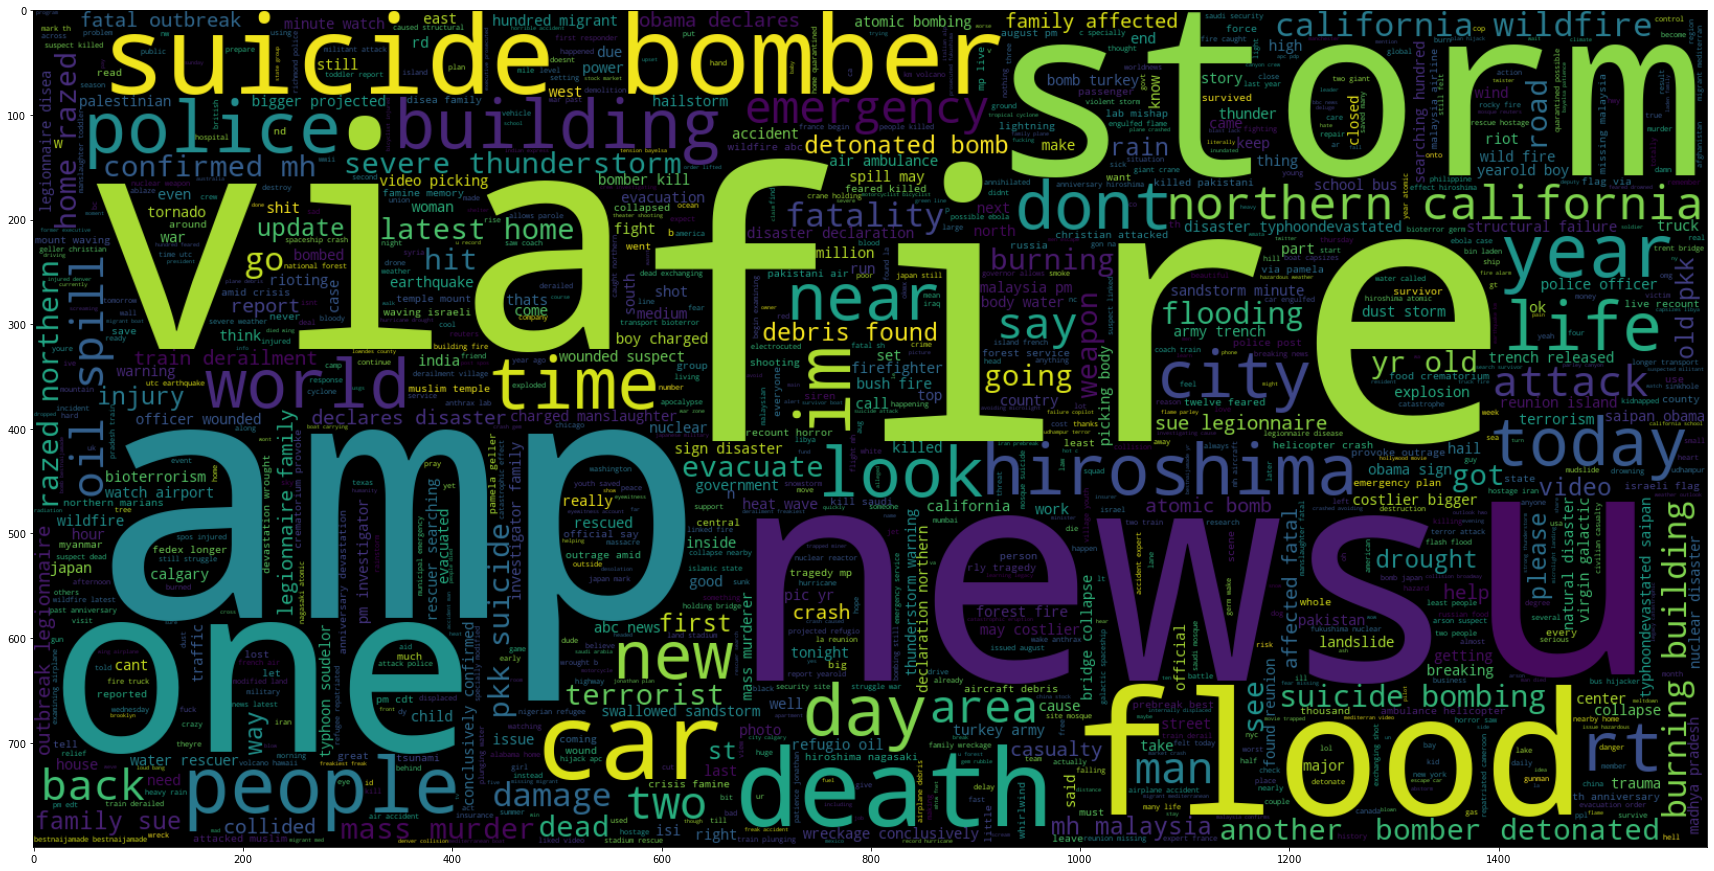

In [25]:
#Représentation des tweets annonçant des catastrophes avec WordCloud après nettoyage
from wordcloud import WordCloud
plt.figure(figsize = (30,30)) # Text that is Disaster tweets
wc = WordCloud(max_words = 1000 ,normalize_plurals = False, width = 1600 , height = 800).generate(ConvertirTextNettoye(Disaster_tweet.cleaned_tweet))
plt.imshow(wc , interpolation = 'bilinear')

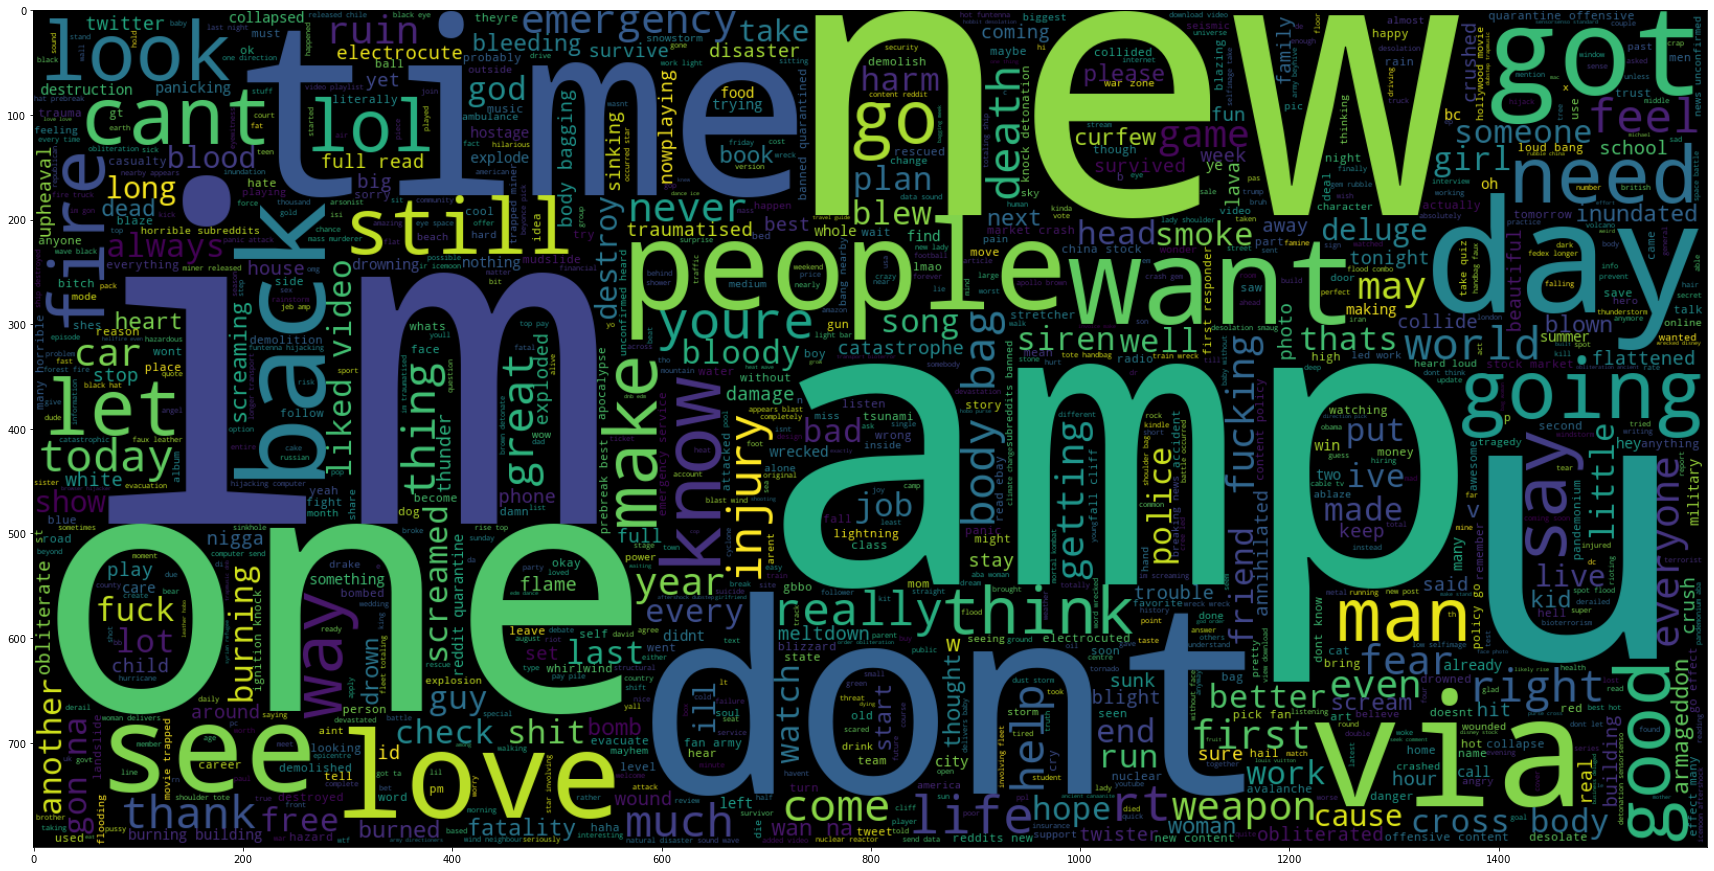

In [26]:
#Représentation des tweets normaux avec WordCloud après nettoyage

plt.figure(figsize = (30,30)) # Text that is Normal Tweets
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(ConvertirTextNettoye(Normal_tweet.cleaned_tweet))
plt.imshow(wc , interpolation = 'bilinear')

Séparation de la base en train et test

In [27]:
y = data.target
X = data.cleaned_tweet

In [28]:
Xbase = []
for t in X:
    
    Xbase.append(' '.join(t))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Xbase, y,test_size=0.20,stratify=y, random_state=0)

TF-IDF Vectorizer

In [30]:
TFIDF_VECTORIZER = TfidfVectorizer(stop_words='english', lowercase = True, max_df=0.8)

## <center> **$\color{green}{\text{III. MODELES TESTES}}$** </center>

### <center> **$\color{green}{\text{III.1. Multinomial NaivTfidfVectorizer}}$** </center>

In [31]:
mnb_clf_pipe = Pipeline([
    ('vectorizer', TFIDF_VECTORIZER),
    ('classifier', MultinomialNB()),
])
mnb_clf_pipe

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', MultinomialNB())])

In [32]:
mnb_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', MultinomialNB())])

In [34]:
predicted = mnb_clf_pipe.predict(X_test)

Model  Accuracy  Precision  Sensitivity  Specificity  \
0  Multinomial Naive Bayes  0.798424    0.83559      0.66055     0.902186   

   F1 Score  
0  0.737831

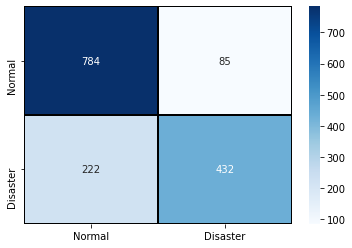

In [35]:
CM = confusion_matrix(y_test,predicted)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, predicted)

prec = precision_score(y_test, predicted)
rec = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)


model_results = pd.DataFrame([['Multinomial Naive Bayes',acc, prec,rec,specificity, f1]],
                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

Model  Accuracy  Precision  Sensitivity  Specificity  \
0  Multinomial Naive Bayes  0.798424    0.83559      0.66055     0.902186   

   F1 Score  
0  0.737831

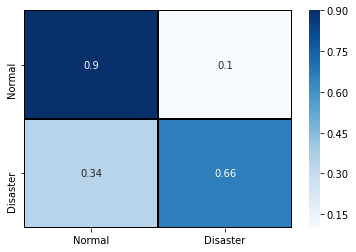

In [132]:
cf = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
cf = [list(map(lambda x: round(float(x), 2), row)) for row in cf]
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])
model_results

In [133]:
print(classification_report(y_test, predicted,
                            target_names=LABELS))

              precision    recall  f1-score   support

      Normal       0.78      0.90      0.84       869
    Disaster       0.84      0.66      0.74       654

   micro avg       0.80      0.80      0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



In [36]:
sentences = tweets = [
  "Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.", # disaster tweet
  "I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.", # normal tweet
  "The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.", # disaster tweet
  "I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.", # normal tweet
  "The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.", # disaster tweet
  "I finally finished my life science project! I'm so relieved to not have to work on it anymore.", # normal tweet
  "The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.", # disaster tweet
  "I just received my first paycheck and I'm so happy! I'll be able to buy all kinds of cool things.", # normal tweet
  "The historic floods that hit the region caused significant damage to homes and roads, and left many people without potable water.", # disaster tweet
  "I just discovered this new music group and they're so good! I'm already a fan." # normal tweet
]


predictions = mnb_clf_pipe.predict(sentences)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[91m{}\033[0m" .format(target))
        print()
    else:
        target="Normal Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[92m{}\033[0m" .format(target))
        print()

Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.: 
Class:Disaster Tweet

I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.: 
Class:Normal Tweet

The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.: 
Class:Disaster Tweet

I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.: 
Class:Normal Tweet

The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.: 
Class:Disaster Tweet

I finally finished my life science project! I'm so relieved to not have to work on it anymore.: 
Class:Normal Tweet

The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.: 
Class:Disaster Tweet

I just received my first payc

Cross Validation

In [37]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=100)
scoring = 'accuracy'

acc_mnb2 = cross_val_score(estimator = mnb_clf_pipe, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_mnb2.mean()

0.7918333333333333

### <center> **$\color{green}{\text{III.2. Regression Logistique}}$** </center> 

In [38]:
lg_clf_pipe = Pipeline([
    ('vectorizer', TFIDF_VECTORIZER),
    ('classifier', LogisticRegression()),
])
lg_clf_pipe

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', LogisticRegression())])

In [39]:
lg_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', LogisticRegression())])

In [40]:
predicted_1 = lg_clf_pipe.predict(X_test)

Model  Accuracy  Precision  Sensitivity  Specificity  \
0  Logistic Regression   0.809586   0.851351     0.674312     0.911392   

   F1 Score  
0   0.75256

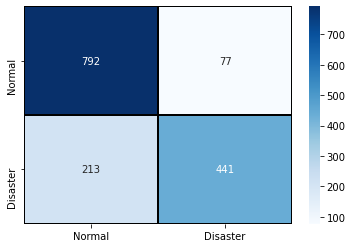

In [41]:
CM = confusion_matrix(y_test,predicted_1)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, predicted_1)

prec = precision_score(y_test, predicted_1)
rec = recall_score(y_test, predicted_1)
f1 = f1_score(y_test, predicted_1)


model_results = pd.DataFrame([['Logistic Regression ',acc, prec,rec,specificity, f1]],
                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

Model  Accuracy  Precision  Sensitivity  Specificity  \
0  Logistic Regression   0.809586   0.851351     0.674312     0.911392   

   F1 Score  
0   0.75256

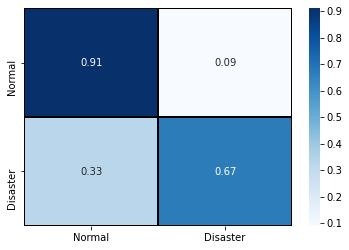

In [42]:
cf = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
cf = [list(map(lambda x: round(float(x), 2), row)) for row in cf]
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])
model_results

In [43]:
print(classification_report(y_test, predicted_1,
                            target_names=LABELS))

              precision    recall  f1-score   support

      Normal       0.79      0.91      0.85       869
    Disaster       0.85      0.67      0.75       654

    accuracy                           0.81      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.82      0.81      0.81      1523



In [44]:
sentences = tweets = [
  "Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.", # disaster tweet
  "I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.", # normal tweet
  "The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.", # disaster tweet
  "I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.", # normal tweet
  "The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.", # disaster tweet
  "I finally finished my life science project! I'm so relieved to not have to work on it anymore.", # normal tweet
  "The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.", # disaster tweet
  "I just received my first paycheck and I'm so happy! I'll be able to buy all kinds of cool things.", # normal tweet
  "The historic floods that hit the region caused significant damage to homes and roads, and left many people without potable water.", # disaster tweet
  "I just discovered this new music group and they're so good! I'm already a fan." # normal tweet
]


predictions = lg_clf_pipe.predict(sentences)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[91m{}\033[0m" .format(target))
        print()
    else:
        target="Normal Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[92m{}\033[0m" .format(target))
        print()

Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.: 
Class:Disaster Tweet

I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.: 
Class:Normal Tweet

The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.: 
Class:Disaster Tweet

I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.: 
Class:Normal Tweet

The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.: 
Class:Disaster Tweet

I finally finished my life science project! I'm so relieved to not have to work on it anymore.: 
Class:Normal Tweet

The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.: 
Class:Disaster Tweet

I just received my first payc

Optimisation des hyperparamètres

In [45]:
rlo_clf_pipe = Pipeline([
    ('vectorizer', TFIDF_VECTORIZER),
    ('classifier', LogisticRegression())
])
rlo_clf_pipe

# Définir les paramètres à tester
param_grid = {'classifier__C': [5,6,7,8], 'classifier__penalty': ['l1', 'l2']}

# Initialiser GridSearchCV
grid_search = GridSearchCV(rlo_clf_pipe, param_grid, cv=10)

In [46]:
# Entraîner le modèle avec la recherche d'hyperparamètres en grille
grid_search.fit(X_train, y_train)
# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)
# Prédire les données de test
y_pred = grid_search.predict(X_test)

Meilleurs hyperparamètres : {'classifier__C': 5, 'classifier__penalty': 'l2'}


Model  Accuracy  Precision  Sensitivity  \
0  Régression logistique with GridSearch  0.799081        0.8      0.70948   

   Specificity  F1 Score  
0     0.866513  0.752026

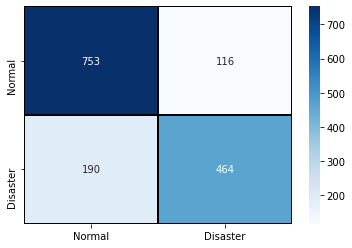

In [47]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, y_pred)

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


model_results = pd.DataFrame([['Régression logistique with GridSearch',acc, prec,rec,specificity, f1]],
                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

Model  Accuracy  Precision  Sensitivity  \
0  Régression logistique with GridSearch  0.799081        0.8      0.70948   

   Specificity  F1 Score  
0     0.866513  0.752026

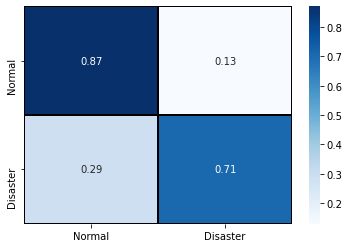

In [48]:
cf = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
cf = [list(map(lambda x: round(float(x), 2), row)) for row in cf]
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])
model_results

In [148]:
print(classification_report(y_test, y_pred,
                            target_names=LABELS))

              precision    recall  f1-score   support

      Normal       0.80      0.87      0.83       869
    Disaster       0.80      0.71      0.75       654

   micro avg       0.80      0.80      0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [49]:
sentences = tweets = [
  "Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.", # disaster tweet
  "I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.", # normal tweet
  "The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.", # disaster tweet
  "I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.", # normal tweet
  "The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.", # disaster tweet
  "I finally finished my life science project! I'm so relieved to not have to work on it anymore.", # normal tweet
  "The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.", # disaster tweet
  "I just received my first paycheck and I'm so happy! I'll be able to buy all kinds of cool things.", # normal tweet
  "The historic floods that hit the region caused significant damage to homes and roads, and left many people without potable water.", # disaster tweet
  "I just discovered this new music group and they're so good! I'm already a fan." # normal tweet
]


predictions = grid_search.predict(sentences)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[91m{}\033[0m" .format(target))
        print()
    else:
        target="Normal Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[92m{}\033[0m" .format(target))
        print()

Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.: 
Class:Disaster Tweet

I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.: 
Class:Normal Tweet

The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.: 
Class:Disaster Tweet

I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.: 
Class:Normal Tweet

The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.: 
Class:Disaster Tweet

I finally finished my life science project! I'm so relieved to not have to work on it anymore.: 
Class:Normal Tweet

The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.: 
Class:Disaster Tweet

I just received my first payc

### <center> **$\color{green}{\text{III.3. Perceptron}}$** </center> 

In [50]:
pt_clf_pipe = Pipeline([
    ('vectorizer', TFIDF_VECTORIZER),
    ('classifier', Perceptron())
])
pt_clf_pipe

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', Perceptron())])

In [51]:
pt_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', Perceptron())])

In [52]:
predicted_2 = pt_clf_pipe.predict(X_test)

Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score
0  Perceptron  0.744583    0.71615     0.671254      0.79977  0.692976

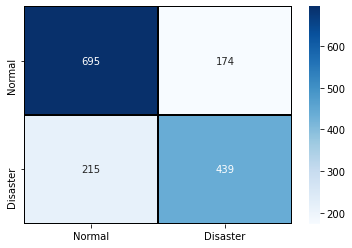

In [53]:
CM = confusion_matrix(y_test,predicted_2)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, predicted_2)

prec = precision_score(y_test, predicted_2)
rec = recall_score(y_test, predicted_2)
f1 = f1_score(y_test, predicted_2)


model_results = pd.DataFrame([['Perceptron',acc, prec,rec,specificity, f1]],
                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score
0  Perceptron  0.744583    0.71615     0.671254      0.79977  0.692976

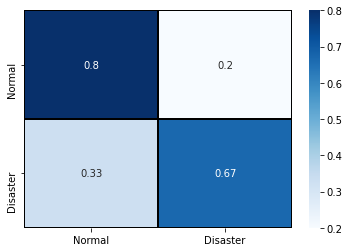

In [54]:
cf = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
cf = [list(map(lambda x: round(float(x), 2), row)) for row in cf]
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])
model_results

In [55]:
print(classification_report(y_test, predicted_2,
                            target_names=LABELS))

              precision    recall  f1-score   support

      Normal       0.76      0.80      0.78       869
    Disaster       0.72      0.67      0.69       654

    accuracy                           0.74      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.74      0.74      0.74      1523



In [75]:
sentences = tweets = [
  "Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.", # disaster tweet
  "I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.", # normal tweet
  "The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.", # disaster tweet
  "I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.", # normal tweet
  "The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.", # disaster tweet
  "I finally finished my life science project! I'm so relieved to not have to work on it anymore.", # normal tweet
  "The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.", # disaster tweet
  "I just received my first paycheck and I'm so happy! I'll be able to buy all kinds of cool things.", # normal tweet
  "The historic floods that hit the region caused significant damage to homes and roads, and left many people without potable water.", # disaster tweet
  "I just discovered this new music group and they're so good! I'm already a fan." # normal tweet
]


predictions = pt_clf_pipe.predict(sentences)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[91m{}\033[0m" .format(target))
        print()
    else:
        target="Normal Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[92m{}\033[0m" .format(target))
        print()

Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.: 
Class:Disaster Tweet

I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.: 
Class:Normal Tweet

The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.: 
Class:Disaster Tweet

I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.: 
Class:Normal Tweet

The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.: 
Class:Disaster Tweet

I finally finished my life science project! I'm so relieved to not have to work on it anymore.: 
Class:Normal Tweet

The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.: 
Class:Disaster Tweet

I just received my first payc

## <center> **$\color{green}{\text{III.4. Random Forest}}$** </center>

In [56]:
rf_clf_pipe = Pipeline([
    ('vectorizer', TFIDF_VECTORIZER),
    ('classifier', RandomForestClassifier()),
])
rf_clf_pipe

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', RandomForestClassifier())])

In [57]:
rf_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', RandomForestClassifier())])

In [58]:
predicted_3 = rf_clf_pipe.predict(X_test)

Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score
0  Random Forest  0.793171   0.811009     0.675841     0.881473  0.737281

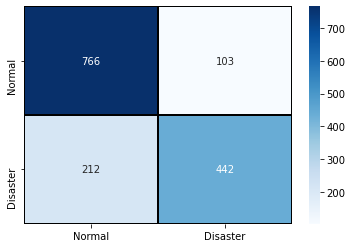

In [89]:
CM = confusion_matrix(y_test,predicted_3)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, predicted_3)

prec = precision_score(y_test, predicted_3)
rec = recall_score(y_test, predicted_3)
f1 = f1_score(y_test, predicted_3)


model_results = pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1]],
                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score
0  Random Forest  0.793171   0.811009     0.675841     0.881473  0.737281

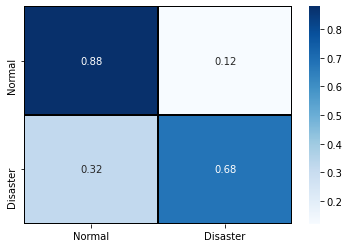

In [90]:
cf = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
cf = [list(map(lambda x: round(float(x), 2), row)) for row in cf]
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])
model_results

In [60]:
sentences = tweets = [
  "Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.", # disaster tweet
  "I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.", # normal tweet
  "The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.", # disaster tweet
  "I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.", # normal tweet
  "The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.", # disaster tweet
  "I finally finished my life science project! I'm so relieved to not have to work on it anymore.", # normal tweet
  "The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.", # disaster tweet
  "I just received my first paycheck and I'm so happy! I'll be able to buy all kinds of cool things.", # normal tweet
  "The historic floods that hit the region caused significant damage to homes and roads, and left many people without potable water.", # disaster tweet
  "I just discovered this new music group and they're so good! I'm already a fan." # normal tweet
]


predictions = rf_clf_pipe.predict(sentences)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[91m{}\033[0m" .format(target))
        print()
    else:
        target="Normal Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[92m{}\033[0m" .format(target))
        print()

Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.: 
Class:Disaster Tweet

I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.: 
Class:Normal Tweet

The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.: 
Class:Disaster Tweet

I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.: 
Class:Normal Tweet

The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.: 
Class:Disaster Tweet

I finally finished my life science project! I'm so relieved to not have to work on it anymore.: 
Class:Normal Tweet

The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.: 
Class:Disaster Tweet

I just received my first payc

In [91]:
print(classification_report(y_test, predicted_3,
                            target_names=LABELS))

              precision    recall  f1-score   support

      Normal       0.78      0.88      0.83       869
    Disaster       0.81      0.68      0.74       654

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523



<center> Optimisation des hyperparamètres avec GridSearch </center> 

In [92]:
rfo_clf_pipe = Pipeline([
    ('vectorizer', TFIDF_VECTORIZER),
    ('classifier', RandomForestClassifier()),
])
rfo_clf_pipe

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, stop_words='english')),
                ('classifier', RandomForestClassifier())])

In [93]:
# Définition des valeurs à essayer
param_grid = {
    'classifier__n_estimators': [5, 10],
    'classifier__max_depth': [10, 12],
    'classifier__min_samples_split': [2, 5]
}

In [94]:
# Création un objet de recherche grille en spécifiant le modèle, les hyperparamètres à essayer et le nombre de folds de la validation croisée
grid_search = GridSearchCV(rfo_clf_pipe, param_grid, cv=5)

In [95]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(max_df=0.8,
                                                        stop_words='english')),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [10, 12],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [5, 10]})

In [96]:
# Affichage des meilleurs hyperparamètres trouvés
print(grid_search.best_params_)

{'classifier__max_depth': 12, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 5}


In [97]:
# Génération des prédictions en utilisant le modèle sur les données de test
predicted_4 = grid_search.predict(X_test)

In [98]:
# Utilisez la fonction classification_report pour générer un rapport de performance
print(classification_report(y_test, predicted_4,
                            target_names=LABELS))

              precision    recall  f1-score   support

      Normal       0.65      0.97      0.78       869
    Disaster       0.88      0.30      0.45       654

    accuracy                           0.68      1523
   macro avg       0.76      0.64      0.61      1523
weighted avg       0.75      0.68      0.64      1523



Model  Accuracy  Precision  Sensitivity  \
0  Random Forest with GridSearch  0.682863   0.876652     0.304281   

   Specificity  F1 Score  
0     0.967779  0.451759

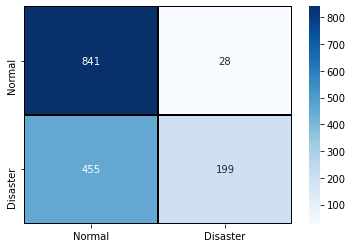

In [99]:
CM = confusion_matrix(y_test,predicted_4)
sns.heatmap(CM,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, predicted_4)

prec = precision_score(y_test, predicted_4)
rec = recall_score(y_test, predicted_4)
f1 = f1_score(y_test, predicted_4)


model_results = pd.DataFrame([['Random Forest with GridSearch',acc, prec,rec,specificity, f1]],
                columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

Model  Accuracy  Precision  Sensitivity  \
0  Random Forest with GridSearch  0.682863   0.876652     0.304281   

   Specificity  F1 Score  
0     0.967779  0.451759

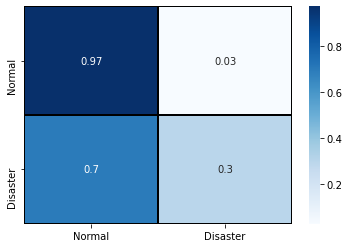

In [100]:
cf = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
cf = [list(map(lambda x: round(float(x), 2), row)) for row in cf]
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Normal', 'Disaster'] , yticklabels = ['Normal', 'Disaster'])
model_results

In [101]:
sentences = tweets = [
  "Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.", # disaster tweet
  "I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.", # normal tweet
  "The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.", # disaster tweet
  "I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.", # normal tweet
  "The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.", # disaster tweet
  "I finally finished my life science project! I'm so relieved to not have to work on it anymore.", # normal tweet
  "The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.", # disaster tweet
  "I just received my first paycheck and I'm so happy! I'll be able to buy all kinds of cool things.", # normal tweet
  "The historic floods that hit the region caused significant damage to homes and roads, and left many people without potable water.", # disaster tweet
  "I just discovered this new music group and they're so good! I'm already a fan." # normal tweet
]


predictions = grid_search.predict(sentences)

for text, label in zip(sentences, predictions):
    if label==1:
        target="Disaster Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[91m{}\033[0m" .format(target))
        print()
    else:
        target="Normal Tweet"
        print("\033[1m{}\033[0m:" .format(text), "\nClass:\033[92m{}\033[0m" .format(target))
        print()

Devastating forest fires have ravaged our region, leaving thousands of people homeless and causing significant economic losses.: 
Class:Normal Tweet

I just discovered this new restaurant in town and it was absolutely delicious! I really recommend giving it a try.: 
Class:Normal Tweet

The 7.0 magnitude earthquake that struck last night caused significant damage in the region, with buildings collapsing and roads cut off.: 
Class:Disaster Tweet

I'm so excited to go on vacation tomorrow! I can't wait to spend time in the sun and relax.: 
Class:Normal Tweet

The tropical cyclone approaching the coast has caused mass evacuations and level 5 storm warnings have been issued for several counties.: 
Class:Normal Tweet

I finally finished my life science project! I'm so relieved to not have to work on it anymore.: 
Class:Normal Tweet

The tsunami that swept over the coast caused massive destruction and left thousands of people homeless.: 
Class:Normal Tweet

I just received my first paycheck a